<a href="https://colab.research.google.com/github/YoonHyeJu/project1/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [5]:
X_train.shape # (50000, 32, 32,3) = (이미지 개수, height, width, channel num)

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

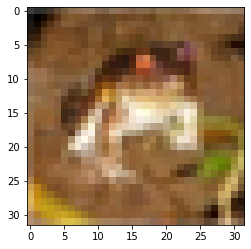

In [7]:
plt.imshow(X_train[0])

In [122]:
X_train[0].shape

(32, 32, 3)

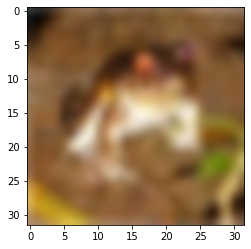

In [8]:
plt.imshow(X_train[0], interpolation="bicubic") # 픽셀 수 확대?????

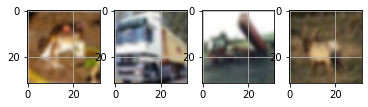

In [9]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(True)

plt.subplot(142)
plt.imshow(X_train[1], interpolation="bicubic")
plt.grid(True)

plt.subplot(143)
plt.grid(True)
plt.imshow(X_train[2], interpolation='bicubic')

plt.subplot(144)
plt.grid(True)
plt.imshow(X_train[3], interpolation='bicubic')

In [10]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
# print ("mean before normalization:", np.mean(X_train)) 
# print ("std before normalization:", np.std(X_train))

# mean=[0,0,0]
# std=[0,0,0]
# newX_train = np.ones(X_train.shape)
# newX_test = np.ones(X_test.shape)
# #train set에 있는 데이터로만 평균과 표준편차를 구함
# for i in range(3):
#     mean[i] = np.mean(X_train[:,:,:,i])
#     std[i] = np.std(X_train[:,:,:,i])

# #train과 test셋 모두 정규화 작업    
# for i in range(3):
#     newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
#     newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
#     newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
#     newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
# X_train = newX_train
# X_test = newX_test

# print ("mean after normalization:", np.mean(X_train))
# print ("std after normalization:", np.std(X_train))
# print(X_train.max())

X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [12]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
batchSize = 512
num_Classes = 10
num_epochs  = 50
learningRate = 0.001

import keras.utils
from keras.utils.np_utils import to_categorical
Y_train = keras.utils.to_categorical(y_train, num_Classes)
Y_test = keras.utils.to_categorical(y_test, num_Classes)

tf.random.set_seed(3)


In [170]:
# model = Sequential()

# model.add(Conv2D(128, kernel_size=(5,5), padding="same", activation="relu", input_shape = (32, 32, 3)))
# model.add(MaxPooling2D())

# model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D())
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# model.add(Dense(num_Classes, activation='softmax'))

model = Sequential()

#model.add(Conv2D(128, kernel_size=(5,5), activation='relu', padding="same", input_shape = (32, 32, 3)))
model.add(Conv2D(128, kernel_size=(5,5), activation='relu', padding="same", input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D()) 

#model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(5,5), padding="same", activation='relu')) # 64->128
model.add(BatchNormalization())
model.add(Dropout(0.15)) # 0.25 -> 0.15

model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation='relu')) ## 32-> 64
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Conv2D(64, kernel_size=(3,3),  padding="same", activation='relu')) ## 추가  ## 32-> 64
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation='relu')) ## 추가  ## 32-> 64
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Flatten())
# 덴스를 좀더 넣는게 좋을 수도 

model.add(Dense(10, activation = 'softmax'))

In [171]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [172]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 128)       9728      
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       409728    
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

In [173]:
history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs, shuffle=True, validation_data=(X_test, Y_test))

Epoch 1/50
98/98 [==============================] - 21s 212ms/step - loss: 1.8809 - accuracy: 0.3796 - val_loss: 3.1391 - val_accuracy: 0.1344
Epoch 2/50
98/98 [==============================] - 20s 208ms/step - loss: 1.3366 - accuracy: 0.5261 - val_loss: 2.9113 - val_accuracy: 0.1403
Epoch 3/50
98/98 [==============================] - 20s 208ms/step - loss: 1.1332 - accuracy: 0.5993 - val_loss: 3.9097 - val_accuracy: 0.1441
Epoch 4/50
98/98 [==============================] - 20s 207ms/step - loss: 0.9905 - accuracy: 0.6488 - val_loss: 1.9713 - val_accuracy: 0.3894
Epoch 5/50
98/98 [==============================] - 20s 207ms/step - loss: 0.8760 - accuracy: 0.6911 - val_loss: 1.6904 - val_accuracy: 0.4775
Epoch 6/50
98/98 [==============================] - 20s 208ms/step - loss: 0.7957 - accuracy: 0.7198 - val_loss: 1.6216 - val_accuracy: 0.5134
Epoch 7/50
98/98 [==============================] - 20s 208ms/step - loss: 0.7280 - accuracy: 0.7440 - val_loss: 1.1056 - val_accuracy: 0.6228

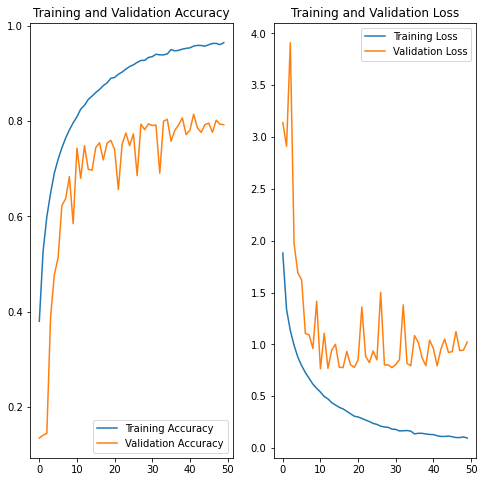

In [174]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [175]:
loss_and_acc = model.evaluate(X_test, Y_test, batch_size=batchSize)
print('Test set Loss and Accuracy')
print(loss_and_acc)

20/20 [==============================] - 1s 55ms/step - loss: 1.0224 - accuracy: 0.7927
Test set Loss and Accuracy
[1.0223722457885742, 0.7926999926567078]


예측: 개 / 정답: 고양이


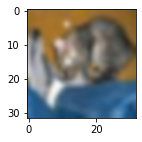

예측: 배 / 정답: 배


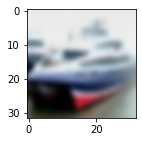

예측: 배 / 정답: 배


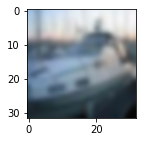

예측: 비행기 / 정답: 비행기


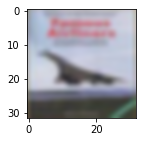

예측: 개구리 / 정답: 개구리


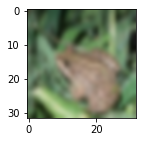

예측: 개 / 정답: 개구리


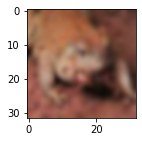

예측: 자동차 / 정답: 자동차


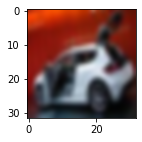

예측: 개구리 / 정답: 개구리


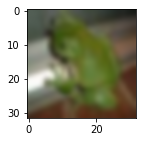

예측: 고양이 / 정답: 고양이


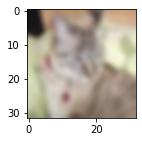

예측: 자동차 / 정답: 자동차


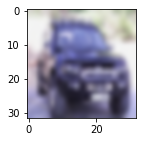

In [176]:
# 모델 사용
labels = ['비행기', '자동차', '새','고양이','사슴','개','개구리','말','배','트럭']

# plt.rcParams["figure.figsize"] = (2,2)

# for i in range(10):
#     output = model.predict(X_test[i].reshape(1, 32, 32, 3))
#     plt.imshow(X_test[i].reshape(32, 32, 3))

#     print("예측: " + np.argmax(output))
#     plt.show()  

# 출력 그림의 크기를 결정합니다.
plt.rcParams["figure.figsize"] = (2,2)
# Test Set의 10개를 맞추어 봅시다.
for i in range(10):
  # 모델 사용 
  output = model.predict(X_test[i].reshape(1,32, 32, 3))
  
  # 이미지 출력 
  plt.imshow(X_test[i].reshape(32, 32, 3), interpolation="bicubic")
  # np.argmax()가 labels의 인덱스가 되어 labels 배열에 있는 문자열을 출력합니다.
  print('예측: ' + labels[np.argmax(output)] + ' / 정답: ' + labels[np.argmax(Y_test[i])])
  plt.show()


In [177]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping() # 조기 종료

history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs, shuffle=True, validation_data=(X_test, Y_test), callbacks=[early_stopping])

Epoch 1/50
98/98 [==============================] - 20s 208ms/step - loss: 0.0920 - accuracy: 0.9664 - val_loss: 1.0840 - val_accuracy: 0.7853
Epoch 2/50
98/98 [==============================] - 20s 206ms/step - loss: 0.0983 - accuracy: 0.9649 - val_loss: 0.9703 - val_accuracy: 0.8044
Epoch 3/50
98/98 [==============================] - 20s 207ms/step - loss: 0.0952 - accuracy: 0.9657 - val_loss: 1.1553 - val_accuracy: 0.7712


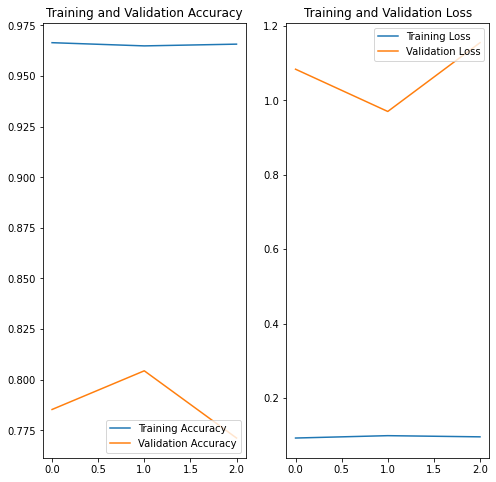

In [178]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [179]:
loss_and_acc = model.evaluate(X_test, Y_test, batch_size=batchSize)
print('Test set Loss and Accuracy')
print(loss_and_acc)

20/20 [==============================] - 1s 55ms/step - loss: 1.1553 - accuracy: 0.7712
Test set Loss and Accuracy
[1.1553255319595337, 0.7712000012397766]


예측: 개 / 정답: 고양이


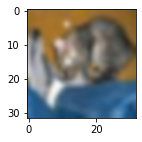

예측: 배 / 정답: 배


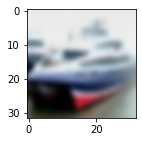

예측: 배 / 정답: 배


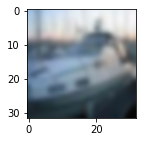

예측: 배 / 정답: 비행기


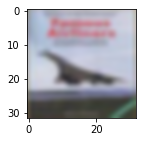

예측: 개구리 / 정답: 개구리


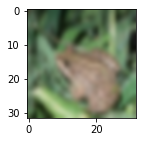

예측: 개 / 정답: 개구리


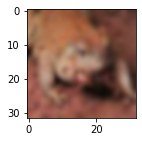

예측: 자동차 / 정답: 자동차


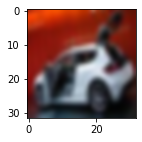

예측: 개구리 / 정답: 개구리


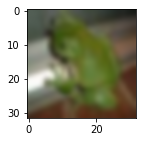

예측: 개 / 정답: 고양이


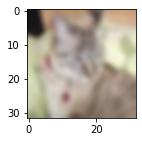

예측: 자동차 / 정답: 자동차


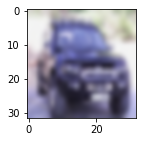

In [180]:
# 모델 사용
labels = ['비행기', '자동차', '새','고양이','사슴','개','개구리','말','배','트럭']

# plt.rcParams["figure.figsize"] = (2,2)

# for i in range(10):
#     output = model.predict(X_test[i].reshape(1, 32, 32, 3))
#     plt.imshow(X_test[i].reshape(32, 32, 3))

#     print("예측: " + np.argmax(output))
#     plt.show()  

# 출력 그림의 크기를 결정합니다.
plt.rcParams["figure.figsize"] = (2,2)
# Test Set의 10개를 맞추어 봅시다.
for i in range(10):
  # 모델 사용 
  output = model.predict(X_test[i].reshape(1,32, 32, 3))
  
  # 이미지 출력 
  plt.imshow(X_test[i].reshape(32, 32, 3), interpolation="bicubic")
  # np.argmax()가 labels의 인덱스가 되어 labels 배열에 있는 문자열을 출력합니다.
  print('예측: ' + labels[np.argmax(output)] + ' / 정답: ' + labels[np.argmax(Y_test[i])])
  plt.show()


In [181]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=5) # 조기 종료

history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs, shuffle=True, validation_data=(X_test, Y_test), callbacks=[early_stopping])

Epoch 1/50
98/98 [==============================] - 20s 207ms/step - loss: 0.0975 - accuracy: 0.9649 - val_loss: 1.1246 - val_accuracy: 0.7867
Epoch 2/50
98/98 [==============================] - 20s 206ms/step - loss: 0.0885 - accuracy: 0.9685 - val_loss: 0.9336 - val_accuracy: 0.8069
Epoch 3/50
98/98 [==============================] - 20s 206ms/step - loss: 0.0790 - accuracy: 0.9715 - val_loss: 0.9583 - val_accuracy: 0.7935
Epoch 4/50
98/98 [==============================] - 20s 206ms/step - loss: 0.0874 - accuracy: 0.9688 - val_loss: 1.1003 - val_accuracy: 0.7898
Epoch 5/50
98/98 [==============================] - 20s 206ms/step - loss: 0.0925 - accuracy: 0.9663 - val_loss: 1.2532 - val_accuracy: 0.7667
Epoch 6/50
98/98 [==============================] - 20s 207ms/step - loss: 0.0802 - accuracy: 0.9717 - val_loss: 0.9279 - val_accuracy: 0.8050
Epoch 7/50
98/98 [==============================] - 20s 206ms/step - loss: 0.0816 - accuracy: 0.9696 - val_loss: 1.0871 - val_accuracy: 0.7969

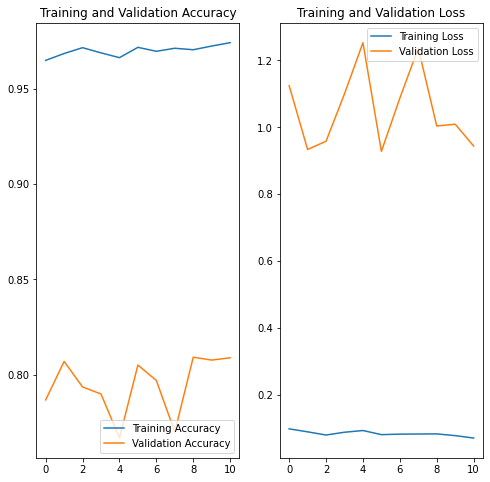

In [182]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [183]:
loss_and_acc = model.evaluate(X_test, Y_test, batch_size=batchSize)
print('Test set Loss and Accuracy')
print(loss_and_acc)

20/20 [==============================] - 1s 55ms/step - loss: 0.9439 - accuracy: 0.8088
Test set Loss and Accuracy
[0.9439395666122437, 0.8087999820709229]


예측: 고양이 / 정답: 고양이


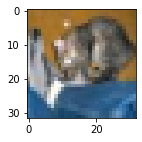

예측: 배 / 정답: 배


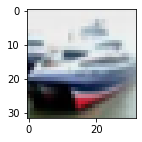

예측: 배 / 정답: 배


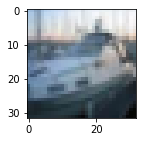

예측: 비행기 / 정답: 비행기


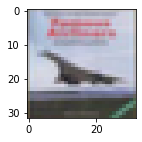

예측: 개구리 / 정답: 개구리


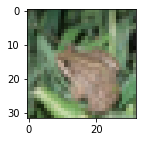

예측: 개구리 / 정답: 개구리


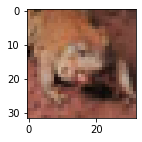

예측: 자동차 / 정답: 자동차


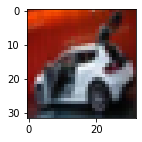

예측: 개구리 / 정답: 개구리


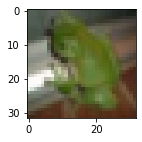

예측: 고양이 / 정답: 고양이


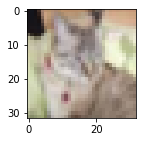

예측: 자동차 / 정답: 자동차


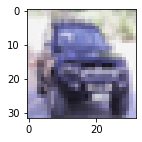

In [184]:
# 모델 사용
labels = ['비행기', '자동차', '새','고양이','사슴','개','개구리','말','배','트럭']

# plt.rcParams["figure.figsize"] = (2,2)

# for i in range(10):
#     output = model.predict(X_test[i].reshape(1, 32, 32, 3))
#     plt.imshow(X_test[i].reshape(32, 32, 3))

#     print("예측: " + np.argmax(output))
#     plt.show()  

# 출력 그림의 크기를 결정합니다.
plt.rcParams["figure.figsize"] = (2,2)
# Test Set의 10개를 맞추어 봅시다.
for i in range(10):
  # 모델 사용 
  output = model.predict(X_test[i].reshape(1,32, 32, 3))
  
  # 이미지 출력 
  plt.imshow(X_test[i].reshape(32, 32, 3))
  # np.argmax()가 labels의 인덱스가 되어 labels 배열에 있는 문자열을 출력합니다.
  print('예측: ' + labels[np.argmax(output)] + ' / 정답: ' + labels[np.argmax(Y_test[i])])
  plt.show()


In [185]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [186]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [206]:
from keras.preprocessing.image import load_img, img_to_array
import cv2

def rescale_image(image_file):
    print(image_file)
    im = plt.imread(image_file)
    return im

def load_and_scale_imgs(img_files):
    imgs = [rescale_image(img_file) for img_file in img_files]
    return np.array(imgs)

PATH = '/content/gdrive/My Drive/Colab Notebooks/cifar_img/'
imgs = []
img = load_img('/content/gdrive/My Drive/Colab Notebooks/cifar_img/dog.jpg')
imgs.append(img)
img = load_img('/content/gdrive/My Drive/Colab Notebooks/cifar_img/airplane.jpg')
imgs.append(img)
img = load_img('/content/gdrive/My Drive/Colab Notebooks/cifar_img/car.jpg')
imgs.append(img)
#plt.imshow(imgs)



In [210]:
X = []
for i in range(len(imgs)):
    img = imgs[i].convert("RGB")
    img = imgs[i].resize((32, 32))
    data = np.asarray(img)
    #data.reshape(-1,32, 32, 3)
    data = data.astype('float32')/255.
    X.append(data)


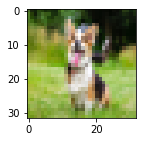

In [191]:
plt.imshow(img)

In [192]:
# img = img_to_array(img)
# prediction = model.predict(img/255)
#img_ = img.astype('float32')/255.

In [211]:
X

[array([[[0.2784314 , 0.40784314, 0.15686275],
         [0.10588235, 0.15294118, 0.05098039],
         [0.06666667, 0.12941177, 0.03529412],
         ...,
         [0.14509805, 0.21960784, 0.08627451],
         [0.06666667, 0.13333334, 0.0627451 ],
         [0.10980392, 0.18039216, 0.07058824]],
 
        [[0.32156864, 0.4862745 , 0.15686275],
         [0.14509805, 0.23529412, 0.03137255],
         [0.06666667, 0.10980392, 0.03137255],
         ...,
         [0.08235294, 0.13333334, 0.05882353],
         [0.0627451 , 0.09411765, 0.05098039],
         [0.09411765, 0.15686275, 0.05882353]],
 
        [[0.30588236, 0.4862745 , 0.14901961],
         [0.14901961, 0.27450982, 0.02745098],
         [0.12156863, 0.21568628, 0.05882353],
         ...,
         [0.06666667, 0.10196079, 0.05098039],
         [0.0627451 , 0.08627451, 0.05098039],
         [0.05882353, 0.09019608, 0.05098039]],
 
        ...,
 
        [[0.5137255 , 0.61960787, 0.19215687],
         [0.61960787, 0.7019608 , 0.29803

In [220]:
#pred = model.predict(X)
output = []
for i in range(len(imgs)):
    pred =  model.predict(X[i].reshape(1, 32, 32, 3))
    output.append(pred)

Prediction:  개


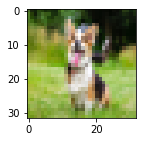

Prediction:  비행기


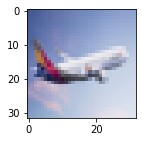

Prediction:  자동차


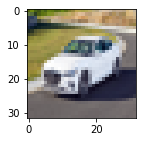

In [230]:
#print(labels[np.argmax(output)])

for i in range(len(imgs)):
    plt.imshow(X[i].reshape(32, 32, 3))
    print("Prediction: ", labels[np.argmax(output[i])])
    plt.show()